<a href="https://colab.research.google.com/github/Anpr1211/R-and-Python-Gigs/blob/master/Data_Collection_using_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, the data for temperature of Kolkata for the last few years has been collected using the [METEOSTAT](https://meteostat.net/en) api. 



In [0]:
# import all the packages

import requests as req
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

The temperature data is on daily basis, from 1st January 2016 to 31st September, 2019. 

This is the time period for which there were no missing data points.

In [0]:
# function get_url() to return url of the site to be accessed with the station id

def get_url(id):

  start_date = '2016-01-01'
  end_date = '2019-09-31'
  url = 'https://api.meteostat.net/v1/history/daily?station=' + str(id) + '&start=' + start_date + '&end=' + end_date + '&key=9Qf3Jufc'
  print(url)

  return(url)

In [0]:
# function get_data() to return the data from the website

def get_data(id):

  url = get_url(id)
  r = req.get(url)
  d = r.json()

  return d

In [0]:
# function get_ind_list() to return a list of dictionaries {'data' : date_value, 'temperature' : value} for each station id

def get_ind_list(data):

  l = []

  for i in range(len(data['data'])):
      
      d_ = {}

      tmp = {'date' : data['data'][i]['date'], 'temperature' : data['data'][i]['temperature']}
      d_.update(tmp)

      l.append(d_)

  return(l)

The area of focus of this project is Kolkata.

As per the website there are 4 weather stations present in Kolkata. Since the other 2 have missing data values, only Dum Dum and Alipore are considered here. 

In [0]:
# station id of Dum Dum and Alipore in Kolkata

index = [42809, 42807]
station = ['Dum Dum', 'Alipore']

In [0]:
# final_list to store list of dictionaries of data for each station

final_list = []

In [0]:
# collecting data from the website

for i in range(len(index)):

  data = get_data(index[i])

  l = get_ind_list(data)

  final_list.append(l)

https://api.meteostat.net/v1/history/daily?station=42809&start=2016-01-01&end=2019-09-31&key=9Qf3Jufc
https://api.meteostat.net/v1/history/daily?station=42807&start=2016-01-01&end=2019-09-31&key=9Qf3Jufc


In [0]:
len(final_list)

2

The data seems to be correct as the average temperature of Kolkata in the month of January is around 19° C.

In [0]:
# temperature data of Dum Dum weather station

final_list[0][0:5]

[{'date': '2016-01-01', 'temperature': 19.3},
 {'date': '2016-01-02', 'temperature': 19.7},
 {'date': '2016-01-03', 'temperature': 19.7},
 {'date': '2016-01-04', 'temperature': 19.3},
 {'date': '2016-01-05', 'temperature': 18.9}]

In [0]:
# temperature data of Alipore weather station

final_list[1][0:5]

[{'date': '2016-01-01', 'temperature': 19.8},
 {'date': '2016-01-02', 'temperature': 20.2},
 {'date': '2016-01-03', 'temperature': 20.2},
 {'date': '2016-01-04', 'temperature': 19.8},
 {'date': '2016-01-05', 'temperature': 19.6}]

A rough plot is made to get an idea of the shape of the data.

In [0]:
# function get_y() to return the data to be plotted on the y-axis

def get_y(l):

  d = pd.DataFrame(l)

  return(list(d['temperature']))

Text(0.5, 1.0, 'Alipore')

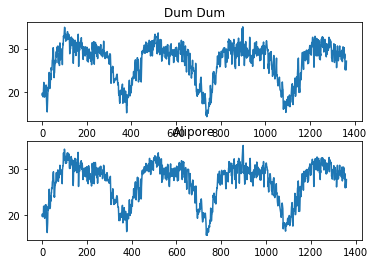

In [0]:
# plot the two datasets to view the rough structure of the data

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(get_y(final_list[0]))
ax1.set_title(station[0])

ax2.plot(get_y(final_list[1]))
ax2.set_title(station[1])

As expected, the plot gradually rises and then drops downwards as the temperature gradually increases from the winter month of January to the summer months of May-June, decreasing again as we move towards December.

The plot also shows a cyclical pattern over the years, repeating the trend with a few variations.

In [0]:
#save the data

with open('Temp_data.json', 'w') as f:
  json.dump(final_list, f)